In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from empiricaldist import Pmf, Cdf
from matplotlib.ticker import PercentFormatter

import warnings
warnings.filterwarnings("ignore")

In [2]:
Child_mortality =pd.read_csv("Infant and Neonatal Mortality.csv")

In [3]:
Child_mortality.head()

,Statistic Label,Year,Age Range,Principal Cause of Death,Area,UNIT,VALUE
0,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Carlow,Number,NaN
1,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,Number,5.0
2,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,Number,NaN
3,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,Number,1.0
4,Deaths,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,Number,NaN


In [4]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "-"]
Child_mortality = pd.read_csv("Infant and Neonatal Mortality.csv", na_values = missing_value_formats,  dtype={'VALUE': float})

In [5]:
##Using interpolation to handle missing values
Child_mortality['VALUE'].interpolate(method='linear', direction = 'forward', inplace=True) 
print(Child_mortality['VALUE'].head(10)) 

0    NaN
1    5.0
2    3.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: VALUE, dtype: float64


In [6]:
Child_mortality = Child_mortality.dropna()
Child_mortality.count() 


Statistic Label             67391
Year                        67391
Age Range                   67391
Principal Cause of Death    67391
Area                        67391
UNIT                        67391
VALUE                       67391
dtype: int64

In [7]:
Child_mortality.isnull().sum()

Statistic Label             0
Year                        0
Age Range                   0
Principal Cause of Death    0
Area                        0
UNIT                        0
VALUE                       0
dtype: int64

## Exploratory Data Analysis

In [8]:
# Calculare media, median, standar deviation
Value = Child_mortality["VALUE"]
Value

1        5.0000
2        3.0000
3        1.0000
4        1.0000
5        1.0000
          ...  
67387    1.0425
67388    1.2900
67389    1.2900
67390    1.2900
67391    1.2900
Name: VALUE, Length: 67391, dtype: float64

In [9]:
Number = Child_mortality.loc[Child_mortality['UNIT']=='Number']
rate = Child_mortality.loc[Child_mortality['UNIT']=='Rate' ] 

In [10]:
Mortality_rate = pd.merge(Number, rate, on=["Year","Age Range","Principal Cause of Death", "Area", ])
Mortality_rate.shape

(33695, 10)

In [11]:
#drop columns

Mortality_rate = Mortality_rate.drop(["Statistic Label_y", "UNIT_x", "UNIT_y","Statistic Label_x"], axis=1)

Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,VALUE_x,VALUE_y
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [12]:
Mortality_rate = Mortality_rate.rename(columns={"Statistic Label_x":"Statistic Label", "VALUE_x": "Number", "VALUE_y":"Rate" })
Mortality_rate.head()

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.0,0.240
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.0,0.475
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.0,0.710
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.0,0.645
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.0,0.580


In [13]:
Number = Mortality_rate["Number"]
Rate = Mortality_rate["Rate"]

In [14]:
def mean(number):
    length = len(number)
    total_sum = 0
    for i in range(length):
        total_sum += number[i]
    average = total_sum / length
    return average

In [15]:
mean_of_number = mean(Number)
print (mean_of_number)

2.358008250482267


In [16]:
np.mean(Number)

2.3580082504822677

In [17]:
def mean(Rate):
    length = len(Rate)
    total_sum = 0
    for i in range(length):
        total_sum += Rate[i]
    average = total_sum / length
    return average

In [18]:
mean_of_rate = mean(Rate)
mean_of_rate

0.8922985606173006

In [19]:
np.mean(Rate)

0.8922985606173023

In [20]:
Number = Mortality_rate["Number"]
def variance(number):
    length=len(number)
    avg=mean(number)
    sumsq=0
    for i in range(length):
        sumsq+=(number[i]-avg)**2
    variance=sumsq/length
    return variance

In [21]:
variance_of_number = variance(Number)
variance_of_number

16.43290664042944

In [22]:
variancen_of_rate = variance(Rate)
variancen_of_rate

0.7261482004973033

In [23]:
def std_dev(number):
    from math import sqrt
    return (sqrt(variance(number)))

In [24]:
def std_dev(Rate):
    from math import sqrt
    return (sqrt(variance(Rate)))

In [25]:
std_dev_of_number = std_dev(Number)
std_dev_of_number 

4.0537521681066595

In [26]:
std_dev_of_rate = std_dev(Rate)
std_dev_of_rate  

0.8521432981003273

### Printing maximun and minimun values for Number and Rate 

In [27]:
print(np.max(Number))
print(np.min(Number))

99.0
0.544


In [28]:
print(np.max(Rate))
print(np.min(Rate))

9.92
0.05


In [29]:
print("0.25th percentile of the Number:", np.quantile(Number,0.25))
print("0.5th percentile of the Number:", np.quantile(Number,0.50))
print("0.75th percentile of the Number:", np.quantile(Number,0.75))

0.25th percentile of the Number: 1.0
0.5th percentile of the Number: 1.0
0.75th percentile of the Number: 2.0


In [30]:
print("0.25th percentile of the Number:", np.quantile(Rate,0.25))
print("0.5th percentile of the Number:", np.quantile(Rate,0.50))
print("0.75th percentile of the Number:", np.quantile(Rate,0.75))

0.25th percentile of the Number: 0.37
0.5th percentile of the Number: 0.6553846153846153
0.75th percentile of the Number: 1.0933333333333333


In [31]:
pyplot.boxplot(Number, sym='*')
pyplot.title("Box Plot for Number")
pyplot.show()

# Create a box plot for the 'Rate' column
pyplot.boxplot(Rate, sym='*')
pyplot.title("Box Plot for Rate")
pyplot.show()

NameError: name 'pyplot' is not defined

In [32]:
import pandas as pd
import numpy as np

Year = Mortality_rate["Year"]
Number = Mortality_rate["Number"]

ts = pd.Series(Number, index=pd.to_datetime(['1/1/' + str(year) for year in Year]))
ts 

1980-01-01   NaN
1980-01-01   NaN
1980-01-01   NaN
1980-01-01   NaN
1980-01-01   NaN
              ..
2018-01-01   NaN
2018-01-01   NaN
2018-01-01   NaN
2018-01-01   NaN
2018-01-01   NaN
Name: Number, Length: 33695, dtype: float64

NameError: name 'pyplot' is not defined

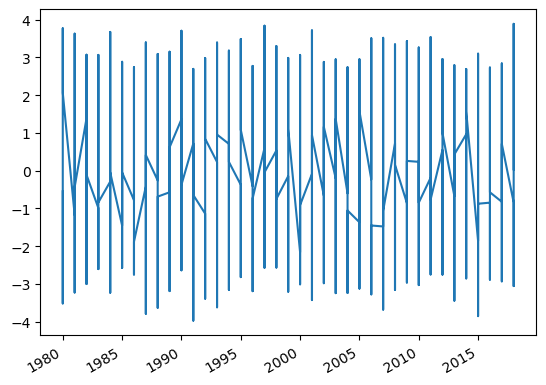

In [33]:
Year= Mortality_rate["Year"]
ts = pd.Series(np.random.randn(len(Rate)), index=pd.to_datetime(['1/1/' + str(year) for year in Year]))
ts.plot()
pyplot.show()

In [35]:
def label_graph(ticksfont, x_label, y_label, title_label, fontsize):
    plt.xticks(fontsize=ticksfont)
    plt.yticks(fontsize=ticksfont)
    plt.xlabel(x_label, fontsize=fontsize)
    plt.ylabel(y_label, fontsize=fontsize)
    plt.title(title_label, fontsize=fontsize)

NameError: name 'label_graph' is not defined

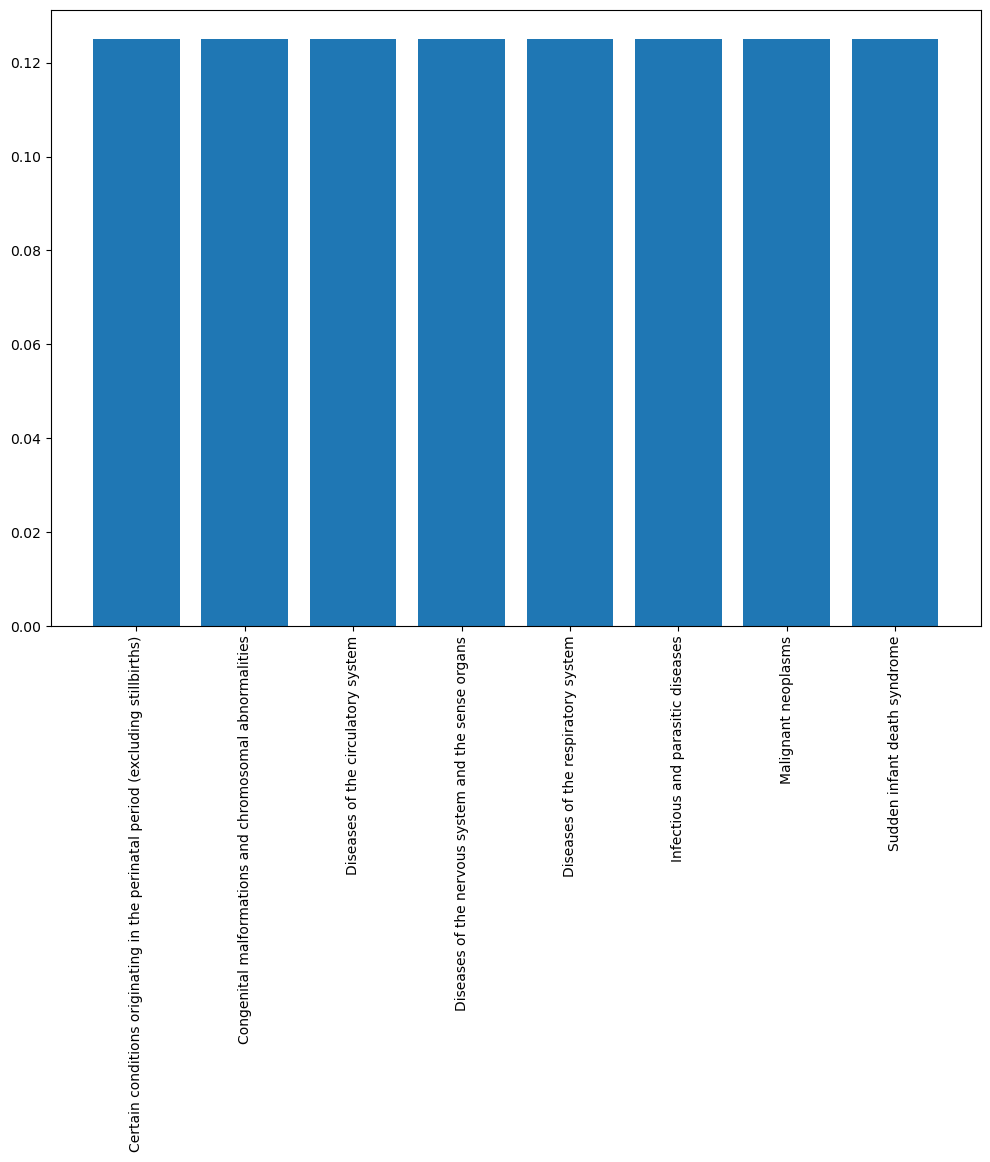

In [34]:
Cause_of_Death = Mortality_rate["Principal Cause of Death"]

fig,ax=plt.subplots(figsize=(12,8))
pmf=Pmf.from_seq(Mortality_rate['Principal Cause of Death'])
pmf.bar()
plt.xticks(rotation=90)
label_graph(18,'Principal Cause of Death', 'PMF', 'Probability of Cause of Death', 20)

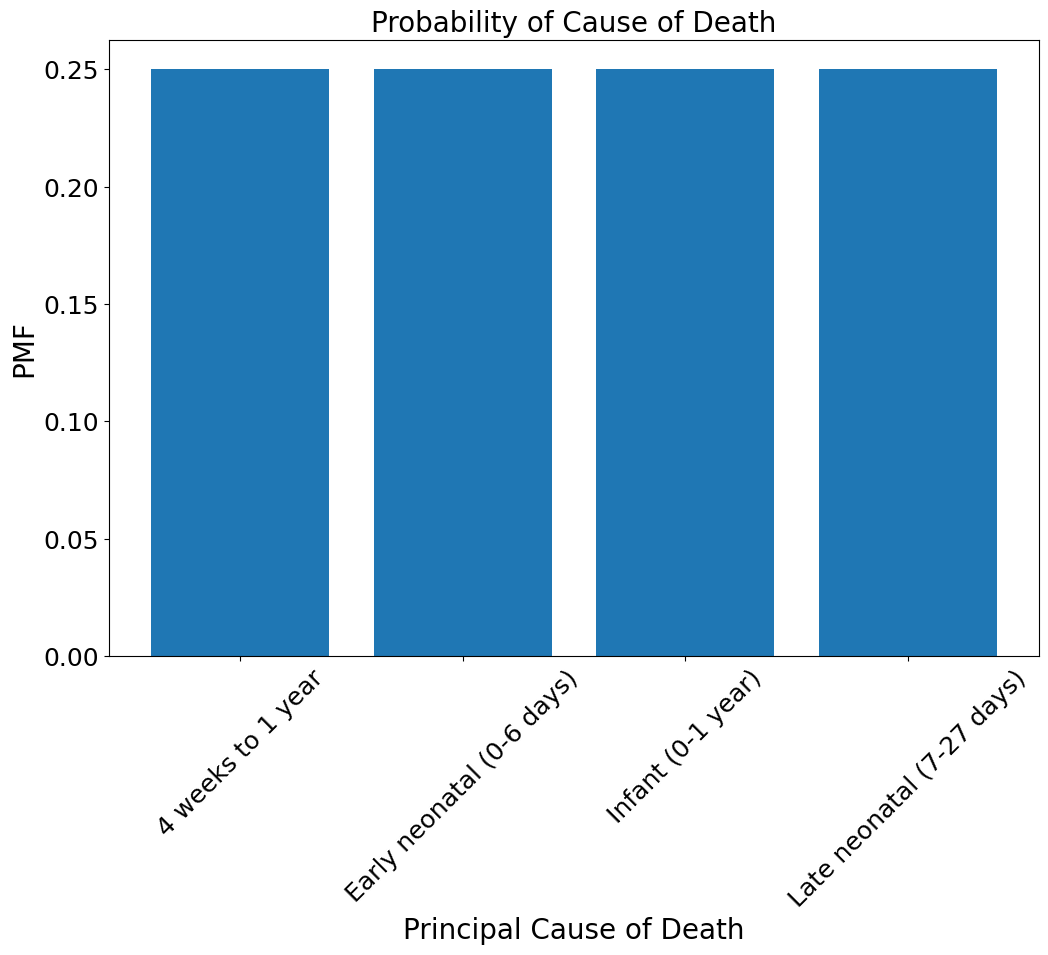

In [36]:
fig,ax=plt.subplots(figsize=(12,8))
pmf=Pmf.from_seq(Mortality_rate['Age Range'])
pmf.bar()
plt.xticks(rotation=45)
label_graph(18,'Principal Cause of Death', 'PMF', 'Probability of Cause of Death', 20)

In [37]:
Mortality_rate.T

,0,1,2,3,4,5,6,7,8,9,...,33685,33686,33687,33688,33689,33690,33691,33692,33693,33694
Year,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
Age Range,Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),Infant (0-1 year),...,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year,4 weeks to 1 year
Principal Cause of Death,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,Infectious and parasitic diseases,...,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome,Sudden infant death syndrome
Area,Dublin City and County,Kildare,Kilkenny,Laois,Longford,Louth,Meath,Offaly,Westmeath,Wexford,...,South Tipperary,Waterford,Galway,Leitrim,Mayo,Roscommon,Sligo,Cavan,Donegal,Monaghan
Number,5.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,3.0,2.0,1.0,1.0,1.0,1.0,1.0,0.848,0.696,0.544
Rate,0.24,0.475,0.71,0.645,0.58,0.515,0.45,0.56,0.67,0.44,...,2.59,1.445,0.3,0.5475,0.795,1.0425,1.29,1.29,1.29,1.29


In [38]:
AREA = Mortality_rate.groupby(['Area'])
print(AREA.groups)

{'Carlow': [26, 53, 80, 107, 134, 161, 188, 215, 242, 269, 296, 323, 350, 377, 404, 431, 458, 485, 512, 539, 566, 593, 620, 647, 674, 701, 728, 755, 782, 809, 836, 863, 890, 917, 944, 971, 998, 1025, 1052, 1079, 1106, 1133, 1160, 1187, 1214, 1241, 1268, 1295, 1322, 1349, 1376, 1403, 1430, 1457, 1484, 1511, 1538, 1565, 1592, 1619, 1646, 1673, 1700, 1727, 1754, 1781, 1808, 1835, 1862, 1889, 1916, 1943, 1970, 1997, 2024, 2051, 2078, 2105, 2132, 2159, 2186, 2213, 2240, 2267, 2294, 2321, 2348, 2375, 2402, 2429, 2456, 2483, 2510, 2537, 2564, 2591, 2618, 2645, 2672, 2699, ...], 'Cavan': [23, 50, 77, 104, 131, 158, 185, 212, 239, 266, 293, 320, 347, 374, 401, 428, 455, 482, 509, 536, 563, 590, 617, 644, 671, 698, 725, 752, 779, 806, 833, 860, 887, 914, 941, 968, 995, 1022, 1049, 1076, 1103, 1130, 1157, 1184, 1211, 1238, 1265, 1292, 1319, 1346, 1373, 1400, 1427, 1454, 1481, 1508, 1535, 1562, 1589, 1616, 1643, 1670, 1697, 1724, 1751, 1778, 1805, 1832, 1859, 1886, 1913, 1940, 1967, 1994, 2021, 20

In [39]:
from scipy.stats import skew

In [41]:
Mortality_rate

,Year,Age Range,Principal Cause of Death,Area,Number,Rate
0,1980,Infant (0-1 year),Infectious and parasitic diseases,Dublin City and County,5.000,0.2400
1,1980,Infant (0-1 year),Infectious and parasitic diseases,Kildare,3.000,0.4750
2,1980,Infant (0-1 year),Infectious and parasitic diseases,Kilkenny,1.000,0.7100
3,1980,Infant (0-1 year),Infectious and parasitic diseases,Laois,1.000,0.6450
4,1980,Infant (0-1 year),Infectious and parasitic diseases,Longford,1.000,0.5800
...,...,...,...,...,...,...
33690,2018,4 weeks to 1 year,Sudden infant death syndrome,Roscommon,1.000,1.0425
33691,2018,4 weeks to 1 year,Sudden infant death syndrome,Sligo,1.000,1.2900
33692,2018,4 weeks to 1 year,Sudden infant death syndrome,Cavan,0.848,1.2900
33693,2018,4 weeks to 1 year,Sudden infant death syndrome,Donegal,0.696,1.2900


In [43]:
from scipy.stats import norm
Mortality_norm =norm.rvs(size=len(Mortality_rate), loc=0, scale=1)
Mortality_norm

array([0.3129492 , 0.30247383, 0.36033946, ..., 0.44527374, 0.8789857 ,
       0.5245518 ])

(array([  38.,  422., 2061., 6058., 9838., 9104., 4576., 1357.,  223.,
          18.]),
 array([-3.77329646, -2.99339871, -2.21350096, -1.4336032 , -0.65370545,
         0.1261923 ,  0.90609006,  1.68598781,  2.46588556,  3.24578331,
         4.02568107]),
 <BarContainer object of 10 artists>)

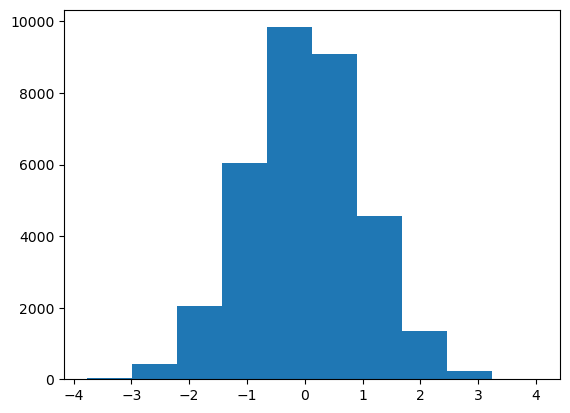

In [44]:
plt.hist(Mortality_norm)

[Text(0.5, 0, 'Normal distribution'), Text(0, 0.5, 'Frequency')]

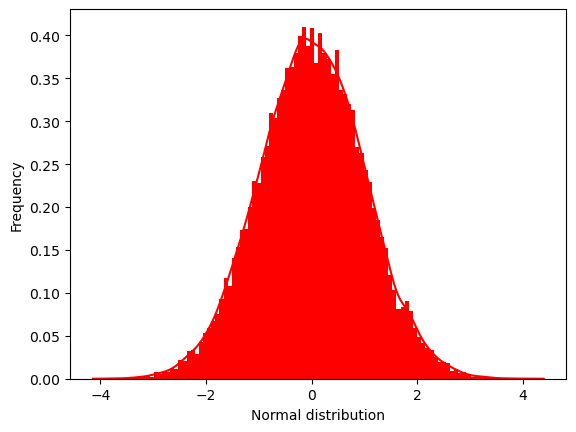

In [45]:
ax=sns.distplot(Mortality_norm, bins =100, kde=True, color="red", hist_kws={"linewidth":1,"alpha":1})
ax.set(xlabel="Normal distribution", ylabel ="Frequency") 

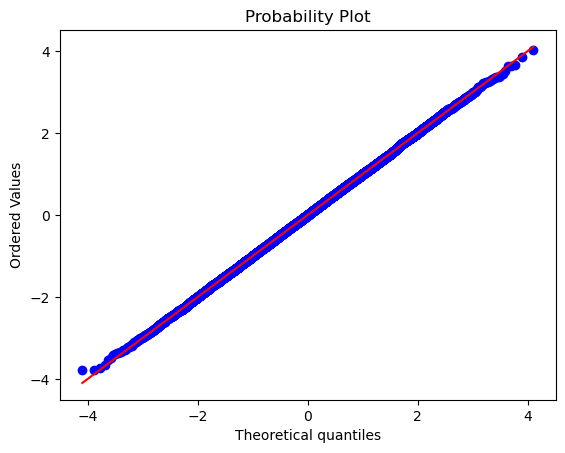

In [46]:
import pylab
import scipy.stats as stats

stats.probplot(Mortality_norm, dist ="norm", plot=pylab)
pylab.show()